### Are Extreme Temperatures a Problem That Our Nation Should be Preparing For?
#### Group Project 2
###### Ver. 2020.04
##### Prof. Flamm

* This project uses the same temperature datasets used in Group Project 1
* Please let me know ASAP if you wish to change either your country or your group
* Your work on this is also likely to be relevant to your individual project


#### Context
Aside from changes in the mean temperature, the government is also worried that climate change will result in more frequent extreme weather events. Your nation has experienced a few major storms and severe heat waves in the past, both of which caused serious damage and disruption to economic activity.
Will weather become more extreme and vary more as a result of climate change? This New York Times article 

[Link to NY Times Article](https://www.nytimes.com/interactive/2017/07/28/climate/more-frequent-extreme-summer-heat.html?emc=edit_th_20170729&nl=todaysheadlines&nlid=36015469)

uses the same temperature datasets you previously had used to investigate the distribution of temperatures and temperature variability over time. Read through this article, paying close attention to the descriptions of the temperature distributions.

As we saw earlier this semester, we can use the mean and median to describe distributions, and we can use deciles to describe parts of distributions. We are now going to create similar plots of temperature distributions to the ones in the New York Times article, and look at different ways of summarizing distributions.


#### Frequency Tables 

* In order to create a column plot using the temperature data we have, we first need to summarize the data using a frequency table. 
* A frequency table is a record of how many observations in a dataset have a particular value, range of values, or belong to a particular category. Instead of using deciles to group the data, we are going to use intervals of .05. For example, temperature anomalies with a value from −0.03 to −0.25 will be in one group, a value greater than −0.25 up until -0.2 in another group, and so on. The frequency table shows us how many values belong to a particular group.
* Pandas has a built-in method (crosstab) that can be used to construct frequency tables; crosstab returns the frequency table as a new dataframe.)



#### Part 1. Changes in Temperature Frequencies
> **A.** Using the annual data for the latitude band corresponding to your country, create two frequency tables similar to the sketch below for the years 1950–1984, and 1985–2019, respectively. The values in the first column should cover the minimum for your latitude band to the maximum, in intervals of 0.05, like this (for example):

                    
                              Frequency
Range of temperature anomaly (T)  
* −0.3                              
                                * 4

* −0.25                            
                                * 2

* ...
                                * ...

* 1.00                           
                                * 2

* 1.05                              
                                * 1

* All ranges                       
                                * 34

To assist you in getting the hang of it, I have prepared a tutorial notebook that uses Pandas to do a frequency table using a simulated dataset. It makes use of the Pandas `cut` function.


> **Q 1.1**
Frequency tables

In [5]:
# the usual suspects...
import sys
import numpy as np                  # pandas uses numpy, and sometimes want to use numpy within pandas
import pandas as pd                    # data package, redundant since already did
import matplotlib.pyplot as plt               # graphics package
import seaborn as sns               # makes matplotlib prettier without issuing a single command!
import datetime as dt                  # date and time module, often need to use
import statsmodels.formula.api as smf

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)

print(plt.style.available)
plt.style.use('fivethirtyeight')
%matplotlib inline 

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas version:  1.0.1
['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [6]:
url='https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv'
df_nasa=pd.read_csv(url)
df_nasa

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.16,-0.28,-0.04,-0.37,-0.12,-0.01,-0.80,-0.48,-0.28,-0.15,-0.09,-0.03,0.05,0.64
1,1881,-0.08,-0.17,0.01,-0.34,0.11,-0.07,-0.90,-0.44,-0.19,0.10,0.12,-0.05,-0.07,0.56
2,1882,-0.10,-0.20,-0.01,-0.30,-0.04,0.01,-1.40,-0.26,-0.13,-0.05,-0.03,0.02,0.04,0.59
3,1883,-0.16,-0.27,-0.06,-0.33,-0.16,-0.01,-0.18,-0.54,-0.23,-0.17,-0.14,-0.03,0.07,0.47
4,1884,-0.28,-0.42,-0.14,-0.60,-0.14,-0.14,-1.28,-0.64,-0.45,-0.13,-0.15,-0.19,-0.02,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2015,0.90,1.18,0.63,1.31,0.96,0.40,2.00,1.47,0.99,0.98,0.95,0.75,0.18,-0.35
136,2016,1.02,1.31,0.73,1.55,1.02,0.49,3.25,1.43,1.07,0.96,1.07,0.67,0.26,0.37
137,2017,0.92,1.18,0.67,1.39,0.82,0.59,2.52,1.37,1.04,0.87,0.78,0.76,0.35,0.53
138,2018,0.85,1.04,0.66,1.25,0.68,0.68,2.17,1.09,1.06,0.73,0.64,0.80,0.37,0.94


In [7]:



#Canberra, Australia at 35.2809° S
dfaussie=df_nasa.loc[:,['Year','Glob','44S-24S']]
print(dfaussie)

     Year  Glob  44S-24S
0    1880 -0.16    -0.03
1    1881 -0.08    -0.05
2    1882 -0.10     0.02
3    1883 -0.16    -0.03
4    1884 -0.28    -0.19
..    ...   ...      ...
135  2015  0.90     0.75
136  2016  1.02     0.67
137  2017  0.92     0.76
138  2018  0.85     0.80
139  2019  0.98     0.75

[140 rows x 3 columns]


Please create the requested frequency tables here:

In [8]:
dfaussie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     140 non-null    int64  
 1   Glob     140 non-null    float64
 2   44S-24S  140 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.4 KB


In [12]:
#Eliminate other years
dfaussie1 = dfaussie[dfaussie['Year']>1949]
dfaussie1

,Year,Glob,44S-24S
70,1950,-0.17,-0.06
71,1951,-0.07,-0.22
72,1952,0.01,-0.10
73,1953,0.08,-0.08
74,1954,-0.13,-0.18
...,...,...,...
135,2015,0.90,0.75
136,2016,1.02,0.67
137,2017,0.92,0.76
138,2018,0.85,0.80


In [13]:
#Seperate 1950-1984 and 1985-2019 time periods
dfaussie1['time_group'] = np.where(dfaussie1['Year'] >1984,1,0)
print(dfaussie1)

     Year  Glob  44S-24S  time_group
70   1950 -0.17    -0.06           0
71   1951 -0.07    -0.22           0
72   1952  0.01    -0.10           0
73   1953  0.08    -0.08           0
74   1954 -0.13    -0.18           0
..    ...   ...      ...         ...
135  2015  0.90     0.75           1
136  2016  1.02     0.67           1
137  2017  0.92     0.76           1
138  2018  0.85     0.80           1
139  2019  0.98     0.75           1

[70 rows x 4 columns]


C:\Users\tenis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# create categorical bin values to put continuous outcomes into
print(len(dfaussie1['44S-24S']))
bin_vals=list(np.arange(-0.3,1.1,0.05))
print(len(bin_vals))
bin_vals

70
28


[-0.3,
 -0.25,
 -0.2,
 -0.15000000000000002,
 -0.10000000000000003,
 -0.050000000000000044,
 -5.551115123125783e-17,
 0.04999999999999993,
 0.09999999999999992,
 0.1499999999999999,
 0.1999999999999999,
 0.24999999999999983,
 0.2999999999999999,
 0.3499999999999999,
 0.39999999999999986,
 0.4499999999999998,
 0.49999999999999983,
 0.5499999999999998,
 0.5999999999999999,
 0.6499999999999997,
 0.6999999999999997,
 0.7499999999999998,
 0.7999999999999996,
 0.8499999999999996,
 0.8999999999999997,
 0.9499999999999997,
 0.9999999999999998,
 1.0499999999999996]

In [15]:
# assign variable var to categorical bin depending on value
dfaussie1['buckets']=pd.cut(dfaussie1['44S-24S'], bins = bin_vals,include_lowest=True)
dfaussie1.head(10)
print(dfaussie1.sort_values('44S-24S'))

     Year  Glob  44S-24S  time_group          buckets
84   1964 -0.20    -0.30           0  (-0.301, -0.25]
86   1966 -0.06    -0.24           0    (-0.25, -0.2]
85   1965 -0.11    -0.23           0    (-0.25, -0.2]
71   1951 -0.07    -0.22           0    (-0.25, -0.2]
74   1954 -0.13    -0.18           0    (-0.2, -0.15]
..    ...   ...      ...         ...              ...
134  2014  0.75     0.72           1      (0.7, 0.75]
139  2019  0.98     0.75           1      (0.75, 0.8]
135  2015  0.90     0.75           1      (0.75, 0.8]
137  2017  0.92     0.76           1      (0.75, 0.8]
138  2018  0.85     0.80           1      (0.8, 0.85]

[70 rows x 5 columns]


C:\Users\tenis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
dfaussie1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 70 to 139
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Year        70 non-null     int64   
 1   Glob        70 non-null     float64 
 2   44S-24S     70 non-null     float64 
 3   time_group  70 non-null     int32   
 4   buckets     70 non-null     category
dtypes: category(1), float64(2), int32(1), int64(1)
memory usage: 4.2 KB


In [17]:
# create crosstab of bucket value vs number of observations in each bucket
xtab=pd.crosstab(dfaussie1.buckets,dfaussie1.time_group,margins=True)
xtab

time_group,0,1,All
buckets,,,
"(-0.301, -0.25]",1,0,1
"(-0.25, -0.2]",3,0,3
"(-0.2, -0.15]",2,0,2
"(-0.15, -0.1]",2,0,2
"(-0.1, -0.05]",8,0,8
"(-0.05, -5.55e-17]",1,0,1
"(-5.55e-17, 0.05]",2,0,2
"(0.05, 0.1]",1,0,1
"(0.1, 0.15]",4,0,4


In [18]:
xtab.columns=['1950-1984','1985-2019','Freq_all'] # rename columns
print(xtab)

                    1950-1984  1985-2019  Freq_all
buckets                                           
(-0.301, -0.25]             1          0         1
(-0.25, -0.2]               3          0         3
(-0.2, -0.15]               2          0         2
(-0.15, -0.1]               2          0         2
(-0.1, -0.05]               8          0         8
(-0.05, -5.55e-17]          1          0         1
(-5.55e-17, 0.05]           2          0         2
(0.05, 0.1]                 1          0         1
(0.1, 0.15]                 4          0         4
(0.15, 0.2]                 3          0         3
(0.2, 0.25]                 5          1         6
(0.25, 0.3]                 1          4         5
(0.3, 0.35]                 1          4         5
(0.35, 0.4]                 1          4         5
(0.4, 0.45]                 0          3         3
(0.45, 0.5]                 0          3         3
(0.5, 0.55]                 0          4         4
(0.55, 0.6]                 0  

#### Part 2. Comparing Distributions
Using these frequency tables:

> Plot two separate charts for 1950–1984 and 1985–2019 to show the distribution of temperatures, with frequency on the vertical axis and the range of temperature anomaly on the horizontal axis. Your goal is to create charts similar in purpose to those in the New York Times article. The easiest way to do this is to do a bar chart.

To assist you in getting the hang of it, the tutorial notebook uses Pandas to plot suitable bar charts from the simulated dataset.

> **Q 2.1** Chart with temperature anomalies plotted.

Text(0.5, 1.0, 'Aussie Temp Anomalies')

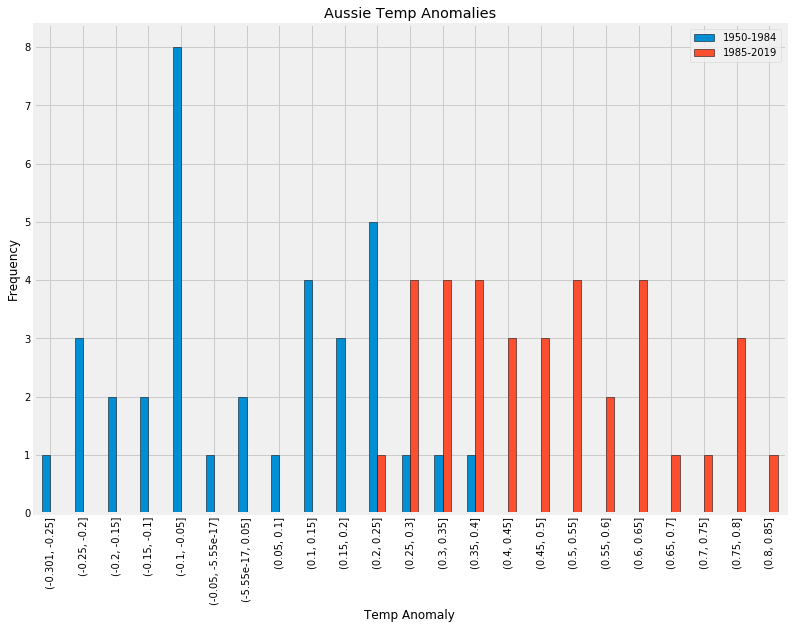

In [19]:
# plot bar plot of your bucket numbers
# drop last row for plot, since we want both time periods as separate bars & don't want sum of buckets on chart
ytab=xtab.iloc[:-1,:-1] # get rid of both margins row and margins column
# use head method on ytab dataframe to see what this did
ytab.plot(kind='bar',edgecolor='k', figsize=(12,9))
plt.xlabel('Temp Anomaly')
plt.ylabel('Frequency')
plt.title('Aussie Temp Anomalies')

> **Q 2.2**
Using your charts, describe the similarities and differences (if any) between the distributions of temperature anomalies in 1950–1984 and 1985–2019.


**For time period 1, years 1950-1984, the temperature anomalies are closer to the average 0 or negative. However, in time period 2, years 1985-2019, the anomalies are consistently above 0 and rarely, if ever, colder than the average.**

### Part 3. Summarizing Distributional Differences

Now we will use our data to look at different aspects of these temperature distributions. First, we will use deciles to determine which observations are ‘normal’ and ‘abnormal’, and illustrate how to use variance. Recall that variance is a measure of dispersion in a frequency distribution, equal to the mean of the squares of the deviations from the arithmetic mean of the distribution. The variance is used to indicate how ‘spread out’ the data is in describing the shape of the distribution. A higher variance means that the data is more spread out. Example: The set of numbers 1, 1, 1 has zero variance (no variation), while the set of numbers 1, 1, 999 has a high variance.
 
The New York Times article considers the bottom third (the lowest or coldest ~thirty percent) of temperature anomalies in 1951–1980 as ‘cold’ and the top third (the highest or hottest ~ thirty percent) of anomalies as ‘hot’. In decile terms, temperatures in the 1st to 3rd decile are ‘cold’ and temperatures in the 7th to 10th decile or above are ‘hot’ (rounded to the nearest decile). We can use Pandas’ `quantile` method to determine what values correspond to the 3rd and 7th decile, across all years in our 1950–1984 subsample.

> **Q 3.1**
Based on the values you found, count the number of anomalies that are considered ‘hot’ in 1985–2019, and express this as a percentage of all the temperature observations in that period. Does your answer suggest that we are experiencing hotter weather more frequently in 1985–2019? (Remember that each decile represents 10% of observations, so ~30% of temperatures were considered ‘hot’ in 1950–1984.)

Finding the declines 

In [20]:
dfaussie1['44S-24S'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0   -0.300
0.1   -0.140
0.2   -0.080
0.3    0.107
0.4    0.206
0.5    0.260
0.6    0.320
0.7    0.420
0.8    0.502
0.9    0.640
1.0    0.800
Name: 44S-24S, dtype: float64

Looping data to see how many years from 1985-2019 were considered "hot", or in the top third deciles

In [21]:
def f(dfaussie1):
    if dfaussie1['44S-24S'] >=  0.420:
        val = "Hot"
    elif dfaussie1['44S-24S'] <=  0.107:
        val = "Cold"
    else:
        val = "Normal"
    return val

In [22]:
dfaussie1['Hot_or_Cold'] = dfaussie1.apply(f, axis=1)

C:\Users\tenis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
dfaussie1_1 = dfaussie1[dfaussie1.time_group == 1]
dfaussie1_2 =  dfaussie1[dfaussie1.time_group == 0]
dfaussie1_1


,Year,Glob,44S-24S,time_group,buckets,Hot_or_Cold
105,1985,0.12,0.30,1,"(0.3, 0.35]",Normal
106,1986,0.18,0.25,1,"(0.25, 0.3]",Normal
107,1987,0.32,0.32,1,"(0.3, 0.35]",Normal
108,1988,0.38,0.38,1,"(0.35, 0.4]",Normal
109,1989,0.27,0.36,1,"(0.35, 0.4]",Normal
110,1990,0.45,0.37,1,"(0.35, 0.4]",Normal
111,1991,0.40,0.31,1,"(0.3, 0.35]",Normal
112,1992,0.22,0.20,1,"(0.2, 0.25]",Normal
113,1993,0.23,0.26,1,"(0.25, 0.3]",Normal
114,1994,0.31,0.26,1,"(0.25, 0.3]",Normal


In [24]:
total_hot = len(dfaussie1_1[dfaussie1_1['Hot_or_Cold'] == 'Hot'])
total_year = len(dfaussie1_1)
total_hot/total_year

0.6285714285714286

From 1985 to 2019 62.3% of years had temperature anomalies in the top 3 deciles. 

> **Q 3.2**
Please calculate mean, median, and variance of temperature around its mean in each of the subsample time periods (1950-84 vs. 1985-2019). Did the variance seem to rise or fall?
Compare the variances in different periods, and explain whether or not temperature appears to be more variable in later periods


In [34]:
print("The mean from 1985-2019 is :% s" % np.mean(dfaussie1_1['44S-24S']))
print("The median from 1985-2019 is :% s" % dfaussie1_1['44S-24S'].quantile([0.5]))
print("The variance from 1985-2019 is :% s" % np.var(dfaussie1_1['44S-24S']))
print("")
print("The mean from 1950-1984 is :% s" % np.mean(dfaussie1_2['44S-24S']))
print("The median from 1950-1984 is :% s" % dfaussie1_2['44S-24S'].quantile([0.5]))
print("The variance from 1950-1984 is :% s" % np.var(dfaussie1_2['44S-24S']))


The mean from 1985-2019 is :0.4817142857142858
The median from 1985-2019 is :0.5    0.48
Name: 44S-24S, dtype: float64
The variance from 1985-2019 is :0.027414204081632653

The mean from 1950-1984 is :0.02199999999999998
The median from 1950-1984 is :0.5    0.0
Name: 44S-24S, dtype: float64
The variance from 1950-1984 is :0.03051885714285715


> **Q 3.3** 
Using the findings of the New York Times article and your answers, discuss whether temperature appears to be more variable over time. Would you advise the government to spend more money on mitigating the effects of extreme weather events?
